In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import math

In [ ]:
def test_func(x, a, b, c, d):
  y = a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d
  return y

This value was taken at 7 in from the fiber coupled output

In [ ]:
voltage = np.array([-0.03, -0.03, 0.01, 0.170, 0.580, 1.08, 1.34, 1.5, 1.62, 1.7, 1.7])
knife_pos = np.array([0.250, 0.255, 0.260, 0.265, 0.270, 0.275, 0.280, 0.285, 0.290, 0.295, 0.3])

I used this formula for my model function: a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d
a = P = 1.7218897789179801, b = 0.27262725596128967, c = w_x = 0.015397705749912623, d = -0.0588392194934394


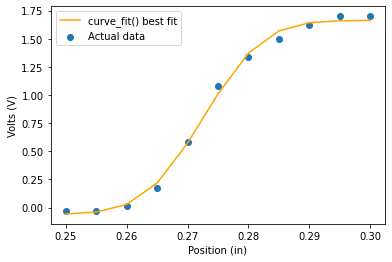

In [ ]:
popt, pcov = curve_fit(test_func, knife_pos, voltage)
print("I used this formula for my model function: a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d")
print(f"a = P = {popt[0]}, b = {popt[1]}, c = w_x = {popt[2]}, d = {popt[3]}")
plt.xlabel("Position (in)")
plt.ylabel("Volts (V)")
plt.scatter(knife_pos, voltage, label="Actual data")
plt.plot(knife_pos, test_func(knife_pos, *popt), color='orange', label="curve_fit() best fit")
plt.legend()

This measurement is at 14 in.

In [ ]:
voltage = np.array([-0.03, -0.03, -0.03, -0.03, -0.03, 0.09, 0.490, 0.900, 1.14, 1.26, 1.36, 1.38, 1.38, 1.38])
knife_pos = np.array([0.2, 0.205, 0.210, 0.215, 0.220, 0.225, 0.230, 0.235, 0.240, 0.245, 0.25, 0.255, 0.260, 0.265])

I used this formula for my model function: a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d
a = P = 1.4045397240669928, b = 0.23246670043863363, c = w_x = 0.01338308943309113, d = -0.04365229864378649


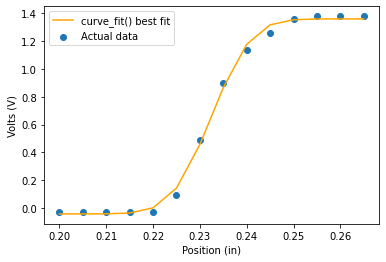

In [ ]:
popt, pcov = curve_fit(test_func, knife_pos, voltage)
print("I used this formula for my model function: a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d")
print(f"a = P = {popt[0]}, b = {popt[1]}, c = w_x = {popt[2]}, d = {popt[3]}")
plt.xlabel("Position (in)")
plt.ylabel("Volts (V)")
plt.scatter(knife_pos, voltage, label="Actual data")
plt.plot(knife_pos, test_func(knife_pos, *popt), color='orange', label="curve_fit() best fit")
plt.legend()

This is the measurement at 20 in.

In [ ]:
voltage = np.array([-0.03, 0.09, 0.370, 0.820, 1.18, 1.46, 1.66, 1.70, 1.72, 1.72])
knife_pos = np.array([0.235, 0.240, 0.245, 0.250, 0.255, 0.260, 0.265, 0.27, 0.275, 0.280])

I used this formula for my model function: a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d
a = P = 1.8373675587792946, b = 0.25021703199617834, c = w_x = 0.01733067059008994, d = -0.11513333018858268


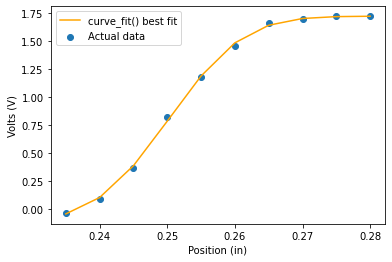

In [ ]:
popt, pcov = curve_fit(test_func, knife_pos, voltage)
print("I used this formula for my model function: a/2 * (1 + erf(math.sqrt(2)*(x-b)/c)) + d")
print(f"a = P = {popt[0]}, b = {popt[1]}, c = w_x = {popt[2]}, d = {popt[3]}")
plt.xlabel("Position (in)")
plt.ylabel("Volts (V)")
plt.scatter(knife_pos, voltage, label="Actual data")
plt.plot(knife_pos, test_func(knife_pos, *popt), color='orange', label="curve_fit() best fit")
plt.legend()

Here are our cavity measurements:

Length of cavity (long side): 16.2 cm
Width of cavity (short side): 7 cm

In [ ]:
def waist(z, w, d):
  l = 2.4921e-5 # in inches
  y = np.sqrt(w**2 + (z-d)**2 * l**2/[math.pi**2 * w**2])
  return y

In [ ]:
z_array = np.array([7, 14, 20]) # in inches
waist_array = np.array([0.015397, 0.013383, 0.017330])  # in inches

I used this formula for my model function: math.sqrt(w**2 + (z-d)**2 * l**2/[math.pi**2 * w**2])
w = 0.014521979046861644, d = 6.332536379743332


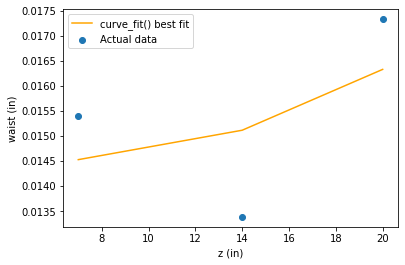

In [ ]:
guess = [0.0101, 14]
popt, pcov = curve_fit(waist, z_array, waist_array, guess)
print("I used this formula for my model function: math.sqrt(w**2 + (z-d)**2 * l**2/[math.pi**2 * w**2])")
print(f"w = {popt[0]}, d = {popt[1]}")
plt.xlabel("z (in)")
plt.ylabel("waist (in)")
plt.scatter(z_array, waist_array, label="Actual data")
#x = np.linspace(0, 1000)
plt.plot(z_array, waist(z_array, *popt), color='orange', label="curve_fit() best fit")
plt.legend()

However, we decided to go with the minimum waist at 14 in.

In [ ]:
def qinv_init(R, w_0, l):
  i = 0 + 1j
  if R == "inf":
    q_inv = - i*l/((math.pi)*(w_0**2))
  elif R != "inf":
    q_inv = 1/R - i*l/((math.pi)*(w_0**2))
  return q_inv

# To get R and waist, check Re(q_inv) and Im(q_inv) respectively.

In [ ]:
def q_transform(q_in, A, B, C, D):
  q_final = (A*(q_in) + B) / (C*(q_in) + D)
  return q_final

In [ ]:
def lens_matrix(f):
  """Enter focal length to get back the ABCD matrix."""
  A = 1
  B = 0
  C = -1/f
  D = 1
  return [A, B, C, D]

def prop_matrix(z):
  A = 1
  B = z
  C = 0
  D = 1
  return [A, B, C, D]

In [ ]:
# Initializing (units in cm)
R = "inf"
#w = 0.013383 in = 0.03399282 cm
w = 0.03399282
q1inv = qinv_init(R, w, 6.33e-5)
#print(q1inv)
q1 = 1/q1inv
#print(q1)
waist_startsq = 1/(-1*(math.pi/6.33e-5)*q1inv.imag)
waist_start = np.sqrt(waist_startsq)
print(f"Waist at start: {waist_start} cm")

# Propagate for 14 in or 35.56 cm
prop_mat = prop_matrix(35.56)
q_after_prop = q_transform(q1, prop_mat[0], prop_mat[1], prop_mat[2], prop_mat[3])
#print(q_after_prop)
q_prop_inv = 1/q_after_prop
waist14insq = 1/(-1*(math.pi/6.33e-5)*q_prop_inv.imag)
waist14in = np.sqrt(waist14insq)
print(f"Waist after 14 in or 35.56 cm: {waist14in} cm")

# Pass through lens of focal length 150 mm or 20 cm
lens_mat = lens_matrix(15)
q_after_lens = q_transform(q_after_prop, lens_mat[0], lens_mat[1], lens_mat[2], lens_mat[3])
#print(q_after_lens)
q_lens_inv = 1/q_after_lens
waistlenssq = 1/(-1*(math.pi/6.33e-5)*q_lens_inv.imag)
waistlens = np.sqrt(waistlenssq)
print(f"Waist after lens: {waistlens} cm")

# Propagate a distance x cm
x = 17.78
prop_mat_x = prop_matrix(x)
q_after_propx = q_transform(q_after_lens, prop_mat_x[0], prop_mat_x[1], prop_mat_x[2], prop_mat_x[3])
q_x_inv = 1/q_after_propx
waistxsq = 1/(-1*(math.pi/6.33e-5)*q_x_inv.imag)
waistx = np.sqrt(waistxsq)
print(f"Waist after propagating a distance {x} cm: {waistx} cm")

# Pass through lens of focal length 150 mm or 15 cm
lens_mat = lens_matrix(15)
q_after_lensx = q_transform(q_after_propx, lens_mat[0], lens_mat[1], lens_mat[2], lens_mat[3])
#print(q_after_lens)
q_lensx_inv = 1/q_after_lensx
waistlensxsq = 1/(-1*(math.pi/6.33e-5)*q_lensx_inv.imag)
waistlensx = np.sqrt(waistlensxsq)
print(f"Waist after lens: {waistlensx} cm")

Waist at start: 0.03399282 cm
Waist after 14 in or 35.56 cm: 0.0399973979035558 cm
Waist after lens: 0.03999739790355578 cm
Waist after propagating a distance 17.78 cm: 0.009147702965863126 cm
Waist after lens: 0.009147702965863126 cm


Now we calculate our cavity q-parameter.

cavity waist (cm) = 0.000953434 cm